# Laboratory 1 - Models in credit and operational risk
**Bartłomiej Jamiołkowski 04.03.2022**

## Exercise 1

**What is LDA (linear discriminant analysis)? What is it for? How are its results interpreted?**

Linear Discriminant Analysis (LDA) is a supervised linear transformation technique used to reduce dimensionality when predicting classes of observations by finding axes represented by directions (linear discriminators) that maximize the distances between the class means and the central point in the mapped lower dimensional space.

**What is the Altman Z-score model? How do we interpret its results?**

The Altman Z-score model is a bankruptcy prediction model that assumes the results in such a way that Z > 3.0 means bankruptcy is unlikely, 1.8 < Z < 3.0 indicates a gray zone and Z < 1.8 can be interpreted as bankruptcy of a given company.

**How does the Altman model relate to credit risk?**

The Altman model indicates the risk of loss (bankruptcy), i.e. failure to fulfill an obligation by the debtor or an unfavorable change in his financial situation.

**What other LDA-based models do you know? Do you think they are better/worse than the original? Why?**

Models based on LDA include: the Hanasik model, the Prusak model, the "Poznań" model, and the "PAN" model. They are better than the original because they have higher efficiencies and a different range of explanatory variables.

## Exercise 2

**Used libraries**

In [61]:
options(warn=-1)
library(dplyr)
library(kableExtra)
library(extraoperators)
library(MASS)

**Data import**

In [62]:
company_data <- read.csv("plik1.csv", header = TRUE, sep=";")

**Description of the variables considered**

- Attr3 (working capital / total assets)
- Attr6 (retained earnings / total assets)
- Attr7 (earnings before interest and tax (EBIT) / total assets)
- Attr8 (market value of equity (book value of equity / total liabilities))
- Attr9 (sales / total assets)
- class (1 - bankrupt company, 0 - company that did not bankrupt in the forecasting period)

**Data cleaning**

Replacing NA characters.

In [63]:
company_data[company_data == "?" | company_data == "-" | company_data == ""] <- NA

NA removal, data type change and reindexing.

In [64]:
company_data <- na.omit(company_data)
company_data <- mutate_all(company_data, function(x) as.numeric(as.character(x)))
rownames(company_data) <- 1:nrow(company_data)
company_data2 <- company_data
company_data3 <- company_data

Searching for outliers in variables used in the model.

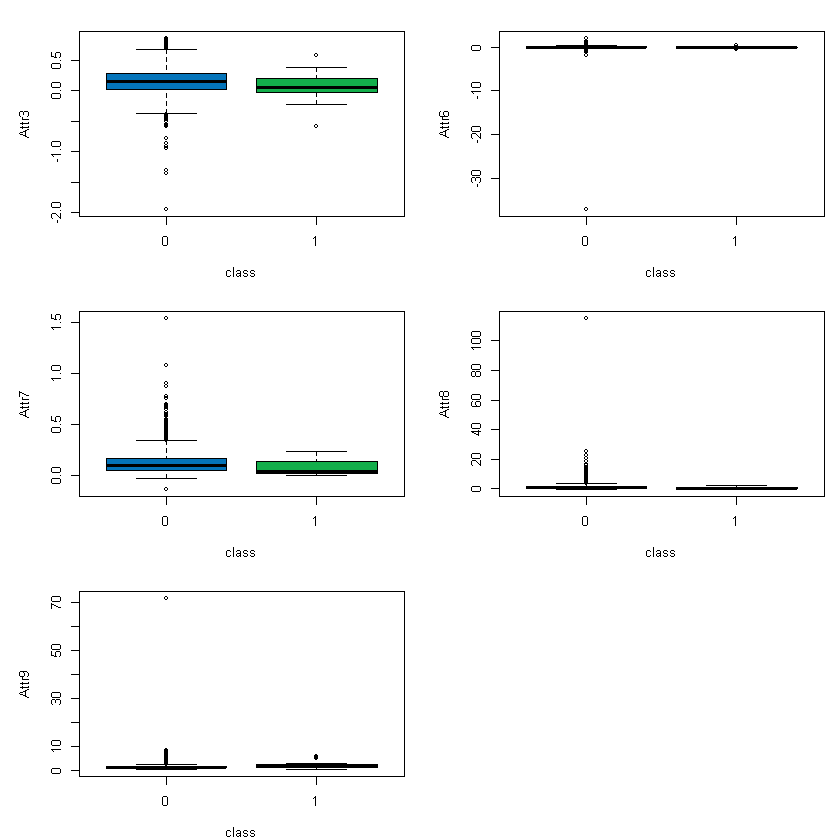

In [65]:
par(mfrow=c(3, 2), mar=c(4,5,2,1))
boxplot(Attr3 ~ class, data = company_data, 
    col=c("#0474BA", "#13ae4b") ,
    ylab="Attr3" , xlab="class")

boxplot(Attr6 ~ class, data = company_data, 
    col=c("#0474BA", "#13ae4b") ,
    ylab="Attr6" , xlab="class")

boxplot(Attr7 ~ class, data = company_data, 
    col=c("#0474BA", "#13ae4b") ,
    ylab="Attr7" , xlab="class")

boxplot(Attr8 ~ class, data = company_data, 
    col=c("#0474BA", "#13ae4b") ,
    ylab="Attr8" , xlab="class")

boxplot(Attr9 ~ class, data = company_data, 
    col=c("#0474BA", "#13ae4b") ,
    ylab="Attr9" , xlab="class")

Removing outliers

Dividing a set by a binary variable.

In [66]:
company_data_0 <- subset(company_data, class == 0)
company_data_1 <- subset(company_data, class == 1)

Removing outliers in a variable **Attr3**.

Setting the boundary from which points are removed as outliers for two subsets.

Detection of quartile values for a variable from a subset of solvent companies.

In [67]:
summary(company_data_0$Attr3)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.95680  0.02052  0.15177  0.15656  0.29058  0.85911 

Calculating the minimum and maximum allowable value of a given variable from this subset.

In [68]:
interquantile_range = 0.29058 - 0.02052
min = 0.02052 - 1.5*interquantile_range
max = 0.29058 + 1.5*interquantile_range

Removing outliers in the dataset and the dataset of non-bankrupt companies by creating subsets.

In [69]:
company_data <- subset(company_data, Attr3 %gele% c(min, max) )
company_data_0 <- subset(company_data_0, Attr3 %gele% c(min, max) )

Detection of quartile values for a variable from a subset of insolvent companies.

In [70]:
summary(company_data_1$Attr3)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.58540 -0.02102  0.05754  0.06775  0.20829  0.58598 

Calculating the minimum and maximum allowable value of a given variable from this subset.

In [71]:
interquantile_range = 0.20829 + 0.02102
min =  -0.02102 - 1.5*interquantile_range
max = 0.20829 + 1.5*interquantile_range

Removing outliers in a dataset and a dataset of companies that went bankrupt by creating subsets.

In [72]:
company_data <- subset(company_data, Attr3 %gele% c(min, max) )
company_data_1 <- subset(company_data_1, Attr3 %gele% c(min, max) )

Removing outliers in a variable **Attr7**

In [73]:
summary(company_data_0$Attr7)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.14438  0.04027  0.09045  0.11871  0.16018  1.53990 

In [74]:
interquantile_range = 0.16018 -  0.04027
min =  0.04027 - 1.5*interquantile_range
max = 0.16018 + 1.5*interquantile_range

In [75]:
company_data <- subset(company_data, Attr7 %gele% c(min, max) )
company_data_0 <- subset(company_data_0, Attr7 %gele% c(min, max) )

In [76]:
summary(company_data_1$Attr7)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001003 0.014544 0.038281 0.072810 0.126070 0.230450 

In [77]:
interquantile_range = 0.126070 - 0.014544
min =  0.014544 - 1.5*interquantile_range
max = 0.126070 + 1.5*interquantile_range

In [78]:
company_data <- subset(company_data, Attr7 %gele% c(min, max) )
company_data_1 <- subset(company_data_1, Attr7 %gele% c(min, max) )

Removing outliers in a variable **Attr8**

In [79]:
summary(company_data_0$Attr8)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 -0.5176   0.4670   0.8818   1.4312   1.6127 115.1900 

In [80]:
interquantile_range = 1.6127 -  0.4670
min =  0.4670 - 1.5*interquantile_range
max = 1.6127 + 1.5*interquantile_range

In [81]:
company_data <- subset(company_data, Attr8 %gele% c(min, max) )
company_data_0 <- subset(company_data_0, Attr8 %gele% c(min, max) )

In [82]:
summary(company_data_1$Attr8)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1002  0.2897  0.5159  0.6691  0.8670  1.9929 

In [83]:
interquantile_range = 0.8670 - 0.2897
min = 0.2897 - 1.5*interquantile_range
max = 0.8670 + 1.5*interquantile_range

In [84]:
company_data <- subset(company_data, Attr8 %gele% c(min, max) )
company_data_1 <- subset(company_data_1, Attr8 %gele% c(min, max) )

Removing outliers in a variable **Attr9**

In [85]:
summary(company_data_0$Attr9)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3212  1.0333  1.1078  1.5095  1.6671 71.5550 

In [86]:
interquantile_range = 1.6671 -  1.0333
min =  1.0333 - 1.5*interquantile_range
max = 1.6671 + 1.5*interquantile_range

In [87]:
company_data <- subset(company_data, Attr9 %gele% c(min, max) )
company_data_0 <- subset(company_data_0, Attr9 %gele% c(min, max) )

In [88]:
summary(company_data_1$Attr9)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2801  1.1803  2.0807  2.1284  2.4644  5.6958 

In [89]:
interquantile_range = 2.4644 - 1.1803 
min = 1.1803 - 1.5*interquantile_range
max = 2.4644 + 1.5*interquantile_range

In [90]:
company_data <- subset(company_data, Attr9 %gele% c(min, max) )
company_data_1 <- subset(company_data_1, Attr9 %gele% c(min, max) )

Re-indexing the data frame

In [91]:
rownames(company_data) <- 1:nrow(company_data)

**Construction of the Altman model**

Explanatory variables of the model:
- x1 = Attr3 (working capital / total assets)
- x2 = Attr6 (retained earnings / total assets)
- x3 = Attr7 (earnings before interest and tax (EBIT) / total assets)
- x4 = Attr8 (market value of equity (book value of equity / total liabilities))
- x5 = Attr9 (sales / total assets)

In [92]:
# company with index 1
z1 = 1.2*company_data$Attr3[1] + 1.4*company_data$Attr6[1] + 3.3*company_data$Attr7[1] + 0.6*company_data$Attr8[1] + 
0.99*company_data$Attr9[1] 
z1
# company with index 2
z2 = 1.2*company_data$Attr3[2] + 1.4*company_data$Attr6[2] + 3.3*company_data$Attr7[2] + 0.6*company_data$Attr8[2] + 
0.99*company_data$Attr9[2] 
z2
# company with index 1817
z3 = 1.2*company_data$Attr3[1817] + 1.4*company_data$Attr6[1817] + 3.3*company_data$Attr7[1817] + 
0.6*company_data$Attr8[1817] + 0.99*company_data$Attr9[1817] 
z3
# company with index 1820
z4 = 1.2*company_data$Attr3[1820] + 1.4*company_data$Attr6[1820] + 3.3*company_data$Attr7[1820] + 
0.6*company_data$Attr8[1820] + 0.99*company_data$Attr9[1820] 
z4
# company with index 1818
z5 = 1.2*company_data$Attr3[1818] + 1.4*company_data$Attr6[1818] + 3.3*company_data$Attr7[1818] + 
0.6*company_data$Attr8[1818] + 0.99*company_data$Attr9[1818] 
z5

[1] 3.769261

[1] 1.78132

[1] 3.657474

[1] 1.392139

[1] 1.514572

**Wnioski**

| Company | Z-score |      Conclusion      | Real value |
| ------- | ------- | -------------------- | ---------- |
|    1    |3.769261 |low prob of bankruptcy|      0     |
|    2    |1.7813202|bankruptcy            |      0     |
|    3    |3.657474 |low prob of bankruptcy|      1     |
|    4    |1.3921386|bankruptcy            |      1     |
|    5    |1.5145716|bankruptcy            |      1     |

The model for company 1 predicts no bankruptcy, which coincides with the data set indicating the solvency of this company.

The model for company 2 predicts bankruptcy. In fact, the company did not go bankrupt.

The model for firm 3 predicts no bankruptcy. In fact, the company went bankrupt.

The model for company 4 predicts bankruptcy, which coincides with the data set indicating the insolvency of this company.

The model for company 5 predicts bankruptcy, which coincides with the data set indicating the insolvency of this company.

## Exercise 3

**Error matrix**

| Pred\Real | 1       | 0       |  
| --------- | ------- | ------- |
|    1      | 2       | 1       |     
|    0      | 1       | 1       |      


In [93]:
# confusion matrix terminology
tp = 2 # true positive
fp = 1 # false positive
fn = 1 # false negative
tn = 1 # true negative
tpr = tp / (tp + fn) # recall - true postitive rate
tpr 
ppv = tp / (tp + fp) # precision - positive predictive value
ppv
f1_score = 2 / ((1 / ppv) + (1 / tpr)) # is the harmonic mean of precision and sensitivity
f1_score

[1] 0.6666667

[1] 0.6666667

[1] 0.6666667

**Conclusions**

- TP indicates that the model positively predicts 2 company bankruptcies,
- FP indicates that the model negatively predicts the bankruptcy of the company 1 time,
- FN indicates that the model negatively predicts for the 1st time that the company will not go bankrupt,
- TN indicates that the model positively predicts that the company will not go bankrupt 1 time,
- TPR indicates a 66.67% percentage of correct predictions in the bankruptcy class,
- PPV indicates a 66.67% share of companies actually identified as bankrupt compared to all companies whose research indicated bankruptcy (correctly and incorrectly predicted),
- F1 score indicates 66.67% test accuracy.

## Exercise 4

The task uses variables from task 2, which involves the use of a cleaned data set. The discussed set is not balanced because the numbers of insolvent and solvent companies are not equal. In order to obtain a balanced data set, a limited number of companies that have not undergone a merger are randomly selected so that the proportions (0/1) are equal.

Creating subsets of a data frame by a binary variable.

In [94]:
company_data_0 <- subset(company_data, class == 0)
company_data_1 <- subset(company_data, class == 1)

Finding information about the number of solvent and bankrupt companies.

In [95]:
dim(company_data_0)

[1] 1804   65

In [96]:
dim(company_data_1)

[1] 17 65

Creating a data frame of randomly selected insolvent companies.

In [97]:
new_company_data_0 <- company_data_0[sample(1:nrow(company_data_0), 17), ]

Combining data frames.

In [98]:
balanced_data <- rbind(new_company_data_0, company_data_1)

Conducting reindexing.

In [99]:
rownames(balanced_data) <- 1:nrow(balanced_data)

### Linear Discriminant Analysis (LDA)

Division of the data set into a training and test set.

In [100]:
set.seed(123)
ind <- sample(2, nrow(balanced_data), replace = TRUE, prob = c(0.8, 0.2))
training <- balanced_data[ind==1,]
testing <- balanced_data[ind==2,]

Creating an LDA model.

In [101]:
LDA = lda(class ~ Attr3 + Attr6 + Attr7 +Attr8 +Attr9, data = training)
LDA

Call:
lda(class ~ Attr3 + Attr6 + Attr7 + Attr8 + Attr9, data = training)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
      Attr3      Attr6      Attr7     Attr8    Attr9
0 0.1123924 0.06071808 0.12086633 0.7560192 1.348929
1 0.0965760 0.02912400 0.08618825 0.5349292 1.885273

Coefficients of linear discriminants:
             LD1
Attr3  0.9658195
Attr6  3.0697110
Attr7 -5.9063019
Attr8 -0.8666317
Attr9  1.6950203

Prediction

In [102]:
LDA_pred = predict(LDA, newdata = testing)
names(LDA_pred)
head(LDA_pred$posterior)

[1] "class"     "posterior" "x"

,0,1
4,0.4871085,0.51289150
5,0.9801226,0.01987742
8,0.9108342,0.08916583
11,0.2720196,0.72798040
16,0.6873788,0.31262123
20,0.6263484,0.37365158


Confusion matrix results.

In [103]:
perf_indexes = function(cm){
 sensitivity = cm[2,2] / (cm[1,2] + cm[2,2])
 specificity = cm[1,1] / (cm[1,1] + cm[2,1])
 accuracy = sum(diag(cm)) / sum(cm)
 return(c(sens=sensitivity,spec=specificity,acc=accuracy))
}
perf_indexes(table(LDA_pred$class, testing$class))

sens spec  acc 
 0.2  0.6  0.4

**Conclusions**

The model's prediction accuracy is approximately 60%.

Specificity indicates the model's ability to predict true negatives in each available category by 60%.

Sensitivity indicates the model's ability to predict true positives within 20% of each available category.

The parameters of the LDA model do not differ from the classic model.

## Exercise 5

### Springate model

**What is the Springate model? What is it for? How are its results interpreted?**

The Springate model consists of 4 financial indicators and is used to determine the probability of company failure by comparing the results with 0.862 (a lower result means bankruptcy and a higher result means security).

Explanatory variables of the model:
- x1 = Attr3 (working capital / total assets)
- x2 = Attr7 (earnings before interest and tax (EBIT) / total assets)
- x3 = Attr12 (gross profit / short-term liabilities)
- x4 = Attr9 (sales / total assets)

In [104]:
z1 = 1.03*company_data$Attr3[1] + 3.07*company_data$Attr7[1] + 0.66*company_data$Attr12[1] + 0.4*company_data$Attr9[1]
z1
z2 = 1.03*company_data$Attr3[2] + 3.07*company_data$Attr7[2] + 0.66*company_data$Attr12[2] + 0.4*company_data$Attr9[2]
z2
z3 = 1.03*company_data$Attr3[1817] + 3.07*company_data$Attr7[1817] + 0.66*company_data$Attr12[1817] + 
0.4*company_data$Attr9[1817]
z3
z4 = 1.03*company_data$Attr3[1820] + 3.07*company_data$Attr7[1820] + 0.66*company_data$Attr12[1820] + 
0.4*company_data2$Attr9[1820]
z4
z5 = 1.03*company_data$Attr3[1818] + 3.07*company_data$Attr7[1818] + 0.66*company_data$Attr12[1818] + 
0.4*company_data2$Attr9[1818]
z5

[1] 2.066094

[1] 0.6553273

[1] 1.8561

[1] 1.454725

[1] 0.4733617

The cutoff threshold in the model is 0.862.

**Conclusions**

| Company | Z-score   |      Conclusion      | Real value |
| ------- | --------- | -------------------- | ---------- |
|    1    |2.0660935  |     no bankrupcy     |      0     |
|    2    |0.65532729 |     bankruptcy       |      0     |
|    3    |1.8560995  |     no bankrupcy     |      1     |
|    4    |1.45472458 |     no bankrupcy     |      1     |
|    5    |0.4733617  |     bankruptcy       |      1     |

The model for company 1 predicts no bankruptcy, which coincides with the data set indicating the solvency of this company.

The model for company 2 predicts bankruptcy. In fact, the company did not go bankrupt.

The model for firm 3 predicts no bankruptcy. In fact, the company went bankrupt.

The model for company 4 predicts no bankruptcy. In fact, the company went bankrupt.

The model for company 5 predicts bankruptcy, which coincides with the data set indicating the insolvency of this company.

### Linear Discriminant Analysis (LDA)

Creating an LDA model.

In [105]:
LDA = lda(class ~ Attr3 + Attr7 + Attr9 + Attr12, data = training)
LDA

Call:
lda(class ~ Attr3 + Attr7 + Attr9 + Attr12, data = training)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
      Attr3      Attr7    Attr9    Attr12
0 0.1123924 0.12086633 1.348929 0.3116945
1 0.0965760 0.08618825 1.885273 0.2632187

Coefficients of linear discriminants:
              LD1
Attr3   -1.347863
Attr7  -22.752835
Attr9    2.024967
Attr12   6.198525

Prediction

In [106]:
LDA_pred = predict(LDA, newdata = testing)
names(LDA_pred)
head(LDA_pred$posterior)

[1] "class"     "posterior" "x"

,0,1
4,0.405393293,0.59460671
5,0.945722596,0.05427740
8,0.946949345,0.05305066
11,0.002456746,0.99754325
16,0.700930449,0.29906955
20,0.760792084,0.23920792


Confusion matrix results.

In [107]:
perf_indexes = function(cm){
 sensitivity = cm[2,2] / (cm[1,2] + cm[2,2])
 specificity = cm[1,1] / (cm[1,1] + cm[2,1])
 accuracy = sum(diag(cm)) / sum(cm)
 return(c(sens=sensitivity,spec=specificity,acc=accuracy))
}
perf_indexes(table(LDA_pred$class, testing$class))

sens spec  acc 
 0.2  0.6  0.4

**Conclusions**

The model's prediction accuracy is approximately 40%.

Specificity indicates the model's ability to predict true negatives in each available category by 60%.

Sensitivity indicates the model's ability to predict true positives within 20% of each available category.

## Exercise 6

### An example of your own LDA model

Explanatory variables of the model:

- Attr3 (working capital / total assets)
- Attr6 (retained earnings / total assets)
- Attr7 (earnings before interest and tax (EBIT) / total assets)
- Attr8 (market value of equity (book value of equity / total liabilities))

Creating an LDA model.

In [108]:
LDA = lda(class ~ Attr3 + Attr6 + Attr7 + Attr8, data = training)
LDA

Call:
lda(class ~ Attr3 + Attr6 + Attr7 + Attr8, data = training)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
      Attr3      Attr6      Attr7     Attr8
0 0.1123924 0.06071808 0.12086633 0.7560192
1 0.0965760 0.02912400 0.08618825 0.5349292

Coefficients of linear discriminants:
             LD1
Attr3  2.0247230
Attr6  0.5877986
Attr7 -7.0219386
Attr8 -1.8945024

Prediction

In [109]:
LDA_pred = predict(LDA, newdata = testing)
names(LDA_pred)
head(LDA_pred$posterior)

[1] "class"     "posterior" "x"

,0,1
4,0.4963373,0.5036627
5,0.6139320,0.3860680
8,0.7021204,0.2978796
11,0.8108364,0.1891636
16,0.4360225,0.5639775
20,0.4624242,0.5375758


Confusion matrix results.

In [110]:
perf_indexes = function(cm){
 sensitivity = cm[2,2] / (cm[1,2] + cm[2,2])
 specificity = cm[1,1] / (cm[1,1] + cm[2,1])
 accuracy = sum(diag(cm)) / sum(cm)
 return(c(sens=sensitivity,spec=specificity,acc=accuracy))
}
perf_indexes(table(LDA_pred$class, testing$class))

sens spec  acc 
 0.6  0.6  0.6

**Conclusions**

The model's prediction accuracy is approximately 60%.

Specificity indicates the model's ability to predict true negatives in each available category by 60%.

Sensitivity indicates the model's ability to predict true positives in each available category by 60%.